## Linear Regression

### About
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

### Imports

```conda info --envs```

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
# import matplotlib.pyplot as pyplot
from matplotlib import pyplot
from matplotlib import style
import pickle
import os

data_dir = '../../data'

### Read CSV

In [5]:
data = pd.read_csv(os.path.join(data_dir ,'students/student-mat.csv'), sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Select columns

In [6]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


### Select Y column

In [7]:
predict = "G3" # label
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

### Split data

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [6]:
linear = linear_model.LinearRegression()

### Train model

In [7]:
linear.fit(x_train, y_train)

LinearRegression()

### Model accuracy

In [8]:
acc = linear.score(x_test, y_test)
acc

0.8674803813870606

### Coefficients
How columns colerate with each other

In [9]:
linear.coef_

array([ 0.14253994,  0.98319227, -0.17274287, -0.31365216,  0.03457558])

In [10]:
linear.intercept_

-1.4175179665404123

### Save best model

In [10]:
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    if acc > best:
        best = acc
        print(f'New best acc: {acc}')
        with open('../../models/student_model.pickle', 'wb') as f:
            pickle.dump(linear, f)

New best acc: 0.8475607807997133
New best acc: 0.9038711397195179
New best acc: 0.9113133981720086


### Save / Load Model

In [11]:
with open('./models/student_model.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [14]:
with open('./models/student_model.pickle', 'rb') as f:
    model = pickle.load(f)

### Plots

Text(0, 0.5, 'Final grade')

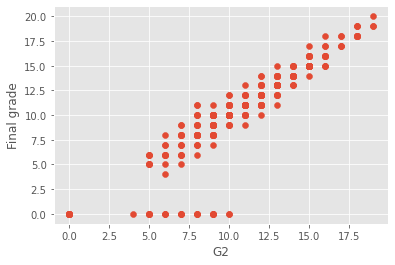

In [11]:
p = "G2"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")